In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import files
upload=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
df=pd.read_csv('Fraud_check.csv')

In [4]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Urban']= label_encoder.fit_transform(df['Urban'])

In [10]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [11]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [12]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,Single,68833,50047,10,1,Good
1,1,Divorced,33700,134075,18,1,Good
2,0,Married,36925,160205,30,1,Good
3,1,Single,50190,193264,15,1,Good
4,0,Married,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1,Good
596,1,Divorced,69967,55369,2,1,Good
597,0,Divorced,47334,154058,0,1,Good
598,1,Married,98592,180083,17,0,Good


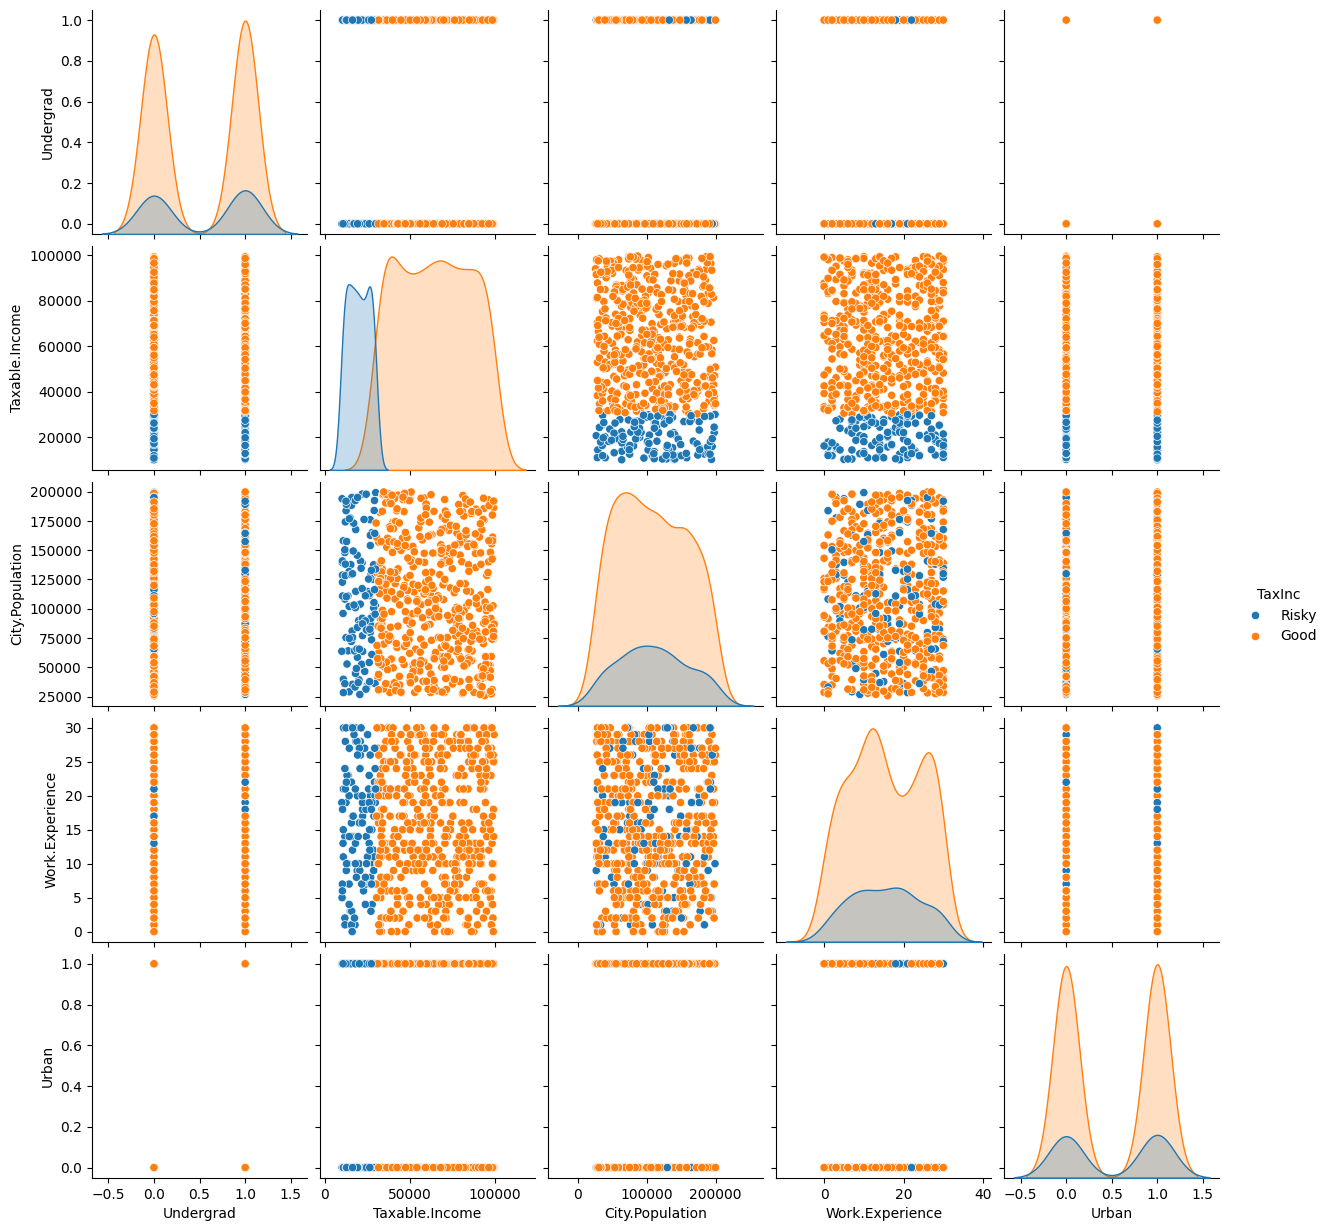

In [13]:
sns.pairplot(data=df, hue = 'TaxInc')

In [14]:
df['TaxInc']= label_encoder.fit_transform(df['TaxInc'])

In [15]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,Single,68833,50047,10,1,0
1,1,Divorced,33700,134075,18,1,0
2,0,Married,36925,160205,30,1,0
3,1,Single,50190,193264,15,1,0
4,0,Married,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1,0
596,1,Divorced,69967,55369,2,1,0
597,0,Divorced,47334,154058,0,1,0
598,1,Married,98592,180083,17,0,0


In [16]:
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])

In [17]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


<Axes: >

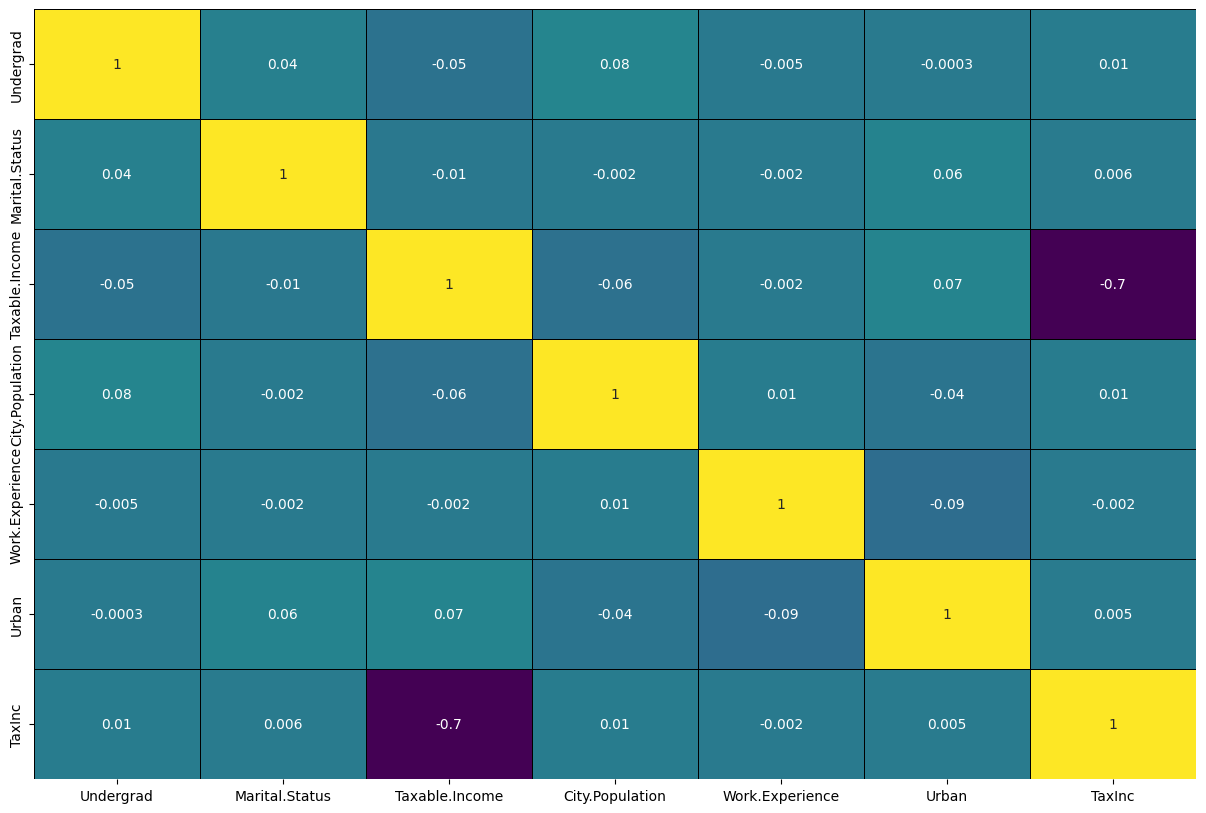

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

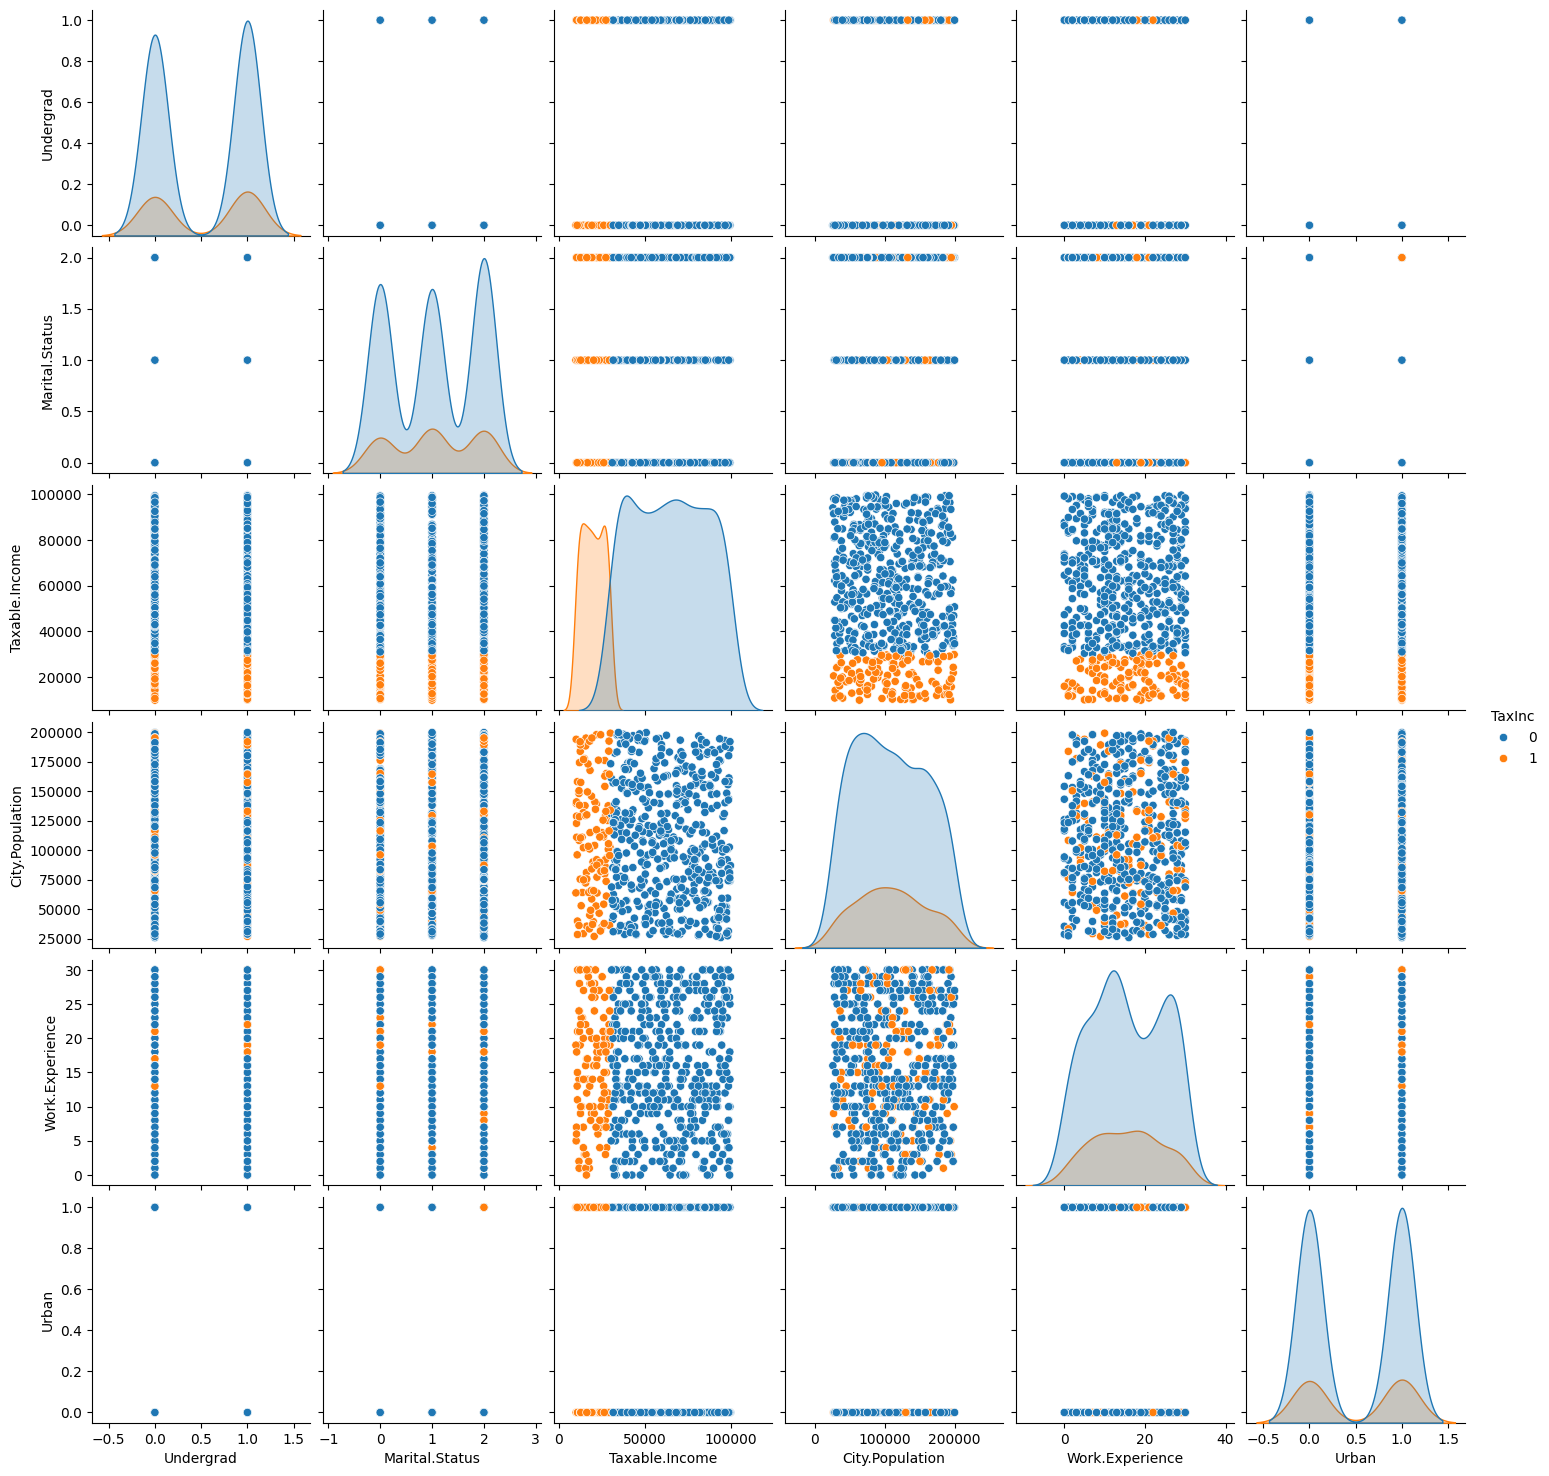

In [19]:
sns.pairplot(data=df, hue = 'TaxInc')

In [20]:
x=df[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']]

In [21]:
y=df[['TaxInc']]

In [22]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results)

[0.71666667 0.7        0.83333333 0.81666667 0.73333333 0.71666667
 0.73333333 0.65       0.78333333 0.75      ]


In [28]:
results.mean()

0.7433333333333333

In [30]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x, y)

print('Best Score',grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.7933333333333333
RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)
